In [1]:
!pip install caer canaro

     |████████████████████████████████| 809 kB 629 kB/s            
     |████████████████████████████████| 22.8 MB 39.5 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77061 sha256=636dacf34e8c86e312cc6e6d6780139091409b2ffd5cbb0c3d1677a7492d8a48
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Successfully uninstalled wrapt-1.13.3
ERROR: pip's dependency resolv

In [2]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler

In [3]:
IMG_SIZE = (80, 80)
CHANNELS = 1
CHAR_PATH = "../input/the-simpsons-characters-dataset/simpsons_dataset"

In [4]:
char_dict = {}
# {Name of Character: Number of Image Available}

for char in os.listdir(CHAR_PATH):
    char_dict[char] = len(os.listdir(os.path.join(CHAR_PATH, char)))

# Sort Dict in Descending Order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [5]:
characters = []
for i in char_dict[:10]:
    characters.append(i[0])
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [6]:
# Create Training Data
train = caer.preprocess_from_dir(CHAR_PATH, characters, channels=CHANNELS, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 2.0271999835968018s
[INFO] At 1000 files
[INFO] 1454 files found in 0.6392292976379395s
[INFO] At 1000 files
[INFO] 1452 files found in 0.6192576885223389s
[INFO] At 1000 files
[INFO] 1354 files found in 0.40021634101867676s
[INFO] At 1000 files
[INFO] 1342 files found in 0.404019832611084s
[INFO] At 1000 files
[INFO] 1291 files found in 0.31128668785095215s
[INFO] At 1000 files
[INFO] 1206 files found in 0.13010597229003906s
[INFO] At 1000 files
[INFO] 1194 files found in 0.10399627685546875s
[INFO] At 1000 files
[INFO] 1193 files found in 0.1349647045135498s
[INFO] At 1000 files
[INFO] 1079 files found in 0.004474163055419922s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 8s


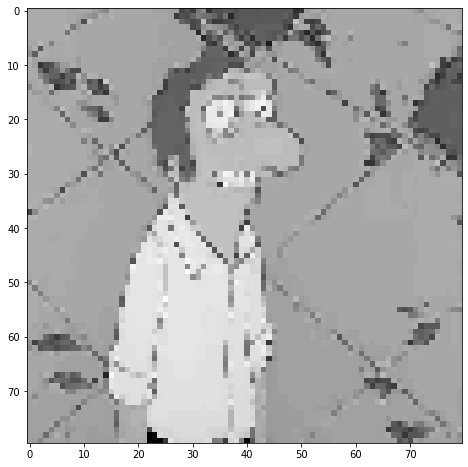

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(train[0][0], cmap="gray")
plt.show()

In [8]:
features, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [9]:
# Normalize the features --> (0, 1)
features = caer.normalize(features)

labels = to_categorical(labels, len(characters))

In [10]:
X_train, X_test, y_train, y_test = caer.train_val_split(features, labels, val_ratio=0.2)

In [11]:
# Removing the variable no more in use to free up some space
del train
del features
del labels
gc.collect()

23

In [12]:
BATCH_SIZE = 32
EPOCHS = 10

In [13]:
# Image data generator
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

In [14]:
# Creating the model
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=CHANNELS, output_dim=len(characters),
                                          loss="binary_crossentropy", decay=1e-6, learning_rate=0.001,
                                          momentum=0.9, nesterov=True)


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [16]:
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [17]:
training = model.fit(train_gen, steps_per_epoch=len(X_train)//BATCH_SIZE, epochs=EPOCHS,
                  validation_data=(X_test, y_test), validation_steps=len(y_test)//BATCH_SIZE,
                  callbacks=callbacks_list)

Epoch 1/10
345/345 [==============================] - 20s 37ms/step - loss: 0.3401 - accuracy: 0.1544 - val_loss: 0.3351 - val_accuracy: 0.1552
Epoch 2/10
345/345 [==============================] - 10s 30ms/step - loss: 0.3235 - accuracy: 0.1619
Epoch 3/10
345/345 [==============================] - 11s 31ms/step - loss: 0.3230 - accuracy: 0.1644
Epoch 4/10
345/345 [==============================] - 10s 30ms/step - loss: 0.3189 - accuracy: 0.1766
Epoch 5/10
345/345 [==============================] - 10s 30ms/step - loss: 0.3091 - accuracy: 0.2198
Epoch 6/10
345/345 [==============================] - 10s 30ms/step - loss: 0.3039 - accuracy: 0.2519
Epoch 7/10
345/345 [==============================] - 10s 29ms/step - loss: 0.3013 - accuracy: 0.2601
Epoch 8/10
345/345 [==============================] - 11s 33ms/step - loss: 0.2987 - accuracy: 0.2711
Epoch 9/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2960 - accuracy: 0.2797
Epoch 10/10
345/345 [===================

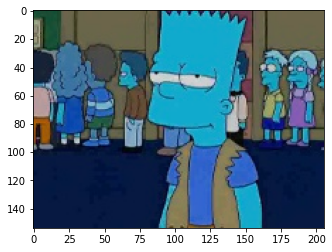

In [18]:
test_img = "../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_19.jpg"

img = cv.imread(test_img)
plt.imshow(img)
plt.show()

In [19]:
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, IMG_SIZE)
    img = caer.reshape(img, IMG_SIZE, CHANNELS)
    return img

In [20]:
predictions = model.predict(prepare(img))
predictions

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
print(characters[np.argmax(predictions[0])])

lisa_simpson
